# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
import re
import matplotlib.pyplot as plt
# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


# Import dataset

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [ ]:
# Shape of each set

print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)

Shape of TRAIN DATA:  (10240, 2)
Shape of TEST DATA:  (2551, 2)


In [ ]:
test.head()

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [ ]:
train.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [ ]:
# Saving the original Data for future

train_orig = train.copy()
test_orig = test.copy()

# Text Pre-Processing

In [ ]:
def process_statements(text):
    
    # Tokenize the words
    tokenized = word_tokenize(text)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words, changing text to lowercase
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token.lower(), pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
#train["Processed"] = train['Statement'].str.lower().apply(process_statements)

# Print the first fifteen rows of Processed
#display(train[["Processed"]].head(15))

In [ ]:
#def tokenize(self, tokenizer=nltk.word_tokenize):
     #   def tokenize_row(row):
      #      row["text"] = tokenizer(row["text"])
      #      row["tokenized_text"] = [] + row["text"]
        #    return row

In [ ]:
train.head()

,Statement,Label,Processed
0,Says the Annies List political group supports ...,False,"[says, annies, list, political, group, support..."
1,When did the decline of coal start? It started...,True,"[decline, coal, start, started, natural, gas, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,"[hillary, clinton, agrees, john, mccain, votin..."
3,Health care reform legislation is likely to ma...,False,"[health, care, reform, legislation, likely, ma..."
4,The economic turnaround started at the end of ...,True,"[economic, turnaround, started, end, term]"


In [ ]:
#from sklearn.model_selection import train_test_split
#Train test split
#X_train, X_test, y_train, y_test = train_test_split(train["Statement"], train["Label"], test_size=0.25)

In [ ]:
X_train = train["Statement"]
X_test = test["Statement"]
y_train = train["Label"]
y_test = test["Label"]

In [ ]:
>>> import nltk
>>> nltk.download('punkt')
>>> nltk.download('stopwords')
>>> nltk.download('wordnet')

# Vectorize the text so the models can actually interpret it
vectorizer = TfidfVectorizer(analyzer=process_statements)
x_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print (x_train_vectorized.shape)
print (x_test_vectorized.shape)
print (y_train.shape)
print (y_test.shape)

(10240, 11179)
(2551, 11179)
(10240,)
(2551,)


# Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)
logR_predicted = log_reg.predict(x_test_vectorized)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(x_test_vectorized, y_test)}")

LogisticRegression accuracy: 0.6095648765190121


In [ ]:
print(classification_report(y_test, logR_predicted))
print('\n')
print(confusion_matrix(y_test, logR_predicted))

              precision    recall  f1-score   support

       False       0.60      0.46      0.52      1169
        True       0.62      0.74      0.67      1382

    accuracy                           0.61      2551
   macro avg       0.61      0.60      0.60      2551
weighted avg       0.61      0.61      0.60      2551



[[ 536  633]
 [ 363 1019]]


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(log_reg, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

0.60498046875

# Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(x_train_vectorized, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(x_test_vectorized, y_test)}")

RandomForestClassifier accuracy: 0.5895727165817326


In [ ]:
rForest_pred = random_forest.predict(x_test_vectorized)
print(classification_report(y_test, rForest_pred))
print('\n')
print(confusion_matrix(y_test, rForest_pred))

              precision    recall  f1-score   support

       False       0.58      0.38      0.46      1169
        True       0.59      0.77      0.67      1382

    accuracy                           0.59      2551
   macro avg       0.59      0.57      0.56      2551
weighted avg       0.59      0.59      0.57      2551



[[ 442  727]
 [ 320 1062]]


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(random_forest, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

array([0.59912109, 0.57519531, 0.56298828, 0.59033203, 0.58642578])

# Multinomial Naive Bayes

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train_vectorized, y_train)
print(f"{multi_nb.__class__.__name__} accuracy: {multi_nb.score(x_test_vectorized, y_test)}")

MultinomialNB accuracy: 0.6203125


In [ ]:
NaiveB_pred = multi_nb.predict(x_test_vectorized)
print(classification_report(y_test, NaiveB_pred))
print('\n')
print(confusion_matrix(y_test, NaiveB_pred))

              precision    recall  f1-score   support

       False       0.59      0.29      0.39      1065
        True       0.63      0.85      0.72      1495

    accuracy                           0.62      2560
   macro avg       0.61      0.57      0.56      2560
weighted avg       0.61      0.62      0.59      2560



[[ 312  753]
 [ 219 1276]]


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(multi_nb, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

# SVM

svm = svm.LinearSVC()
svm.fit(x_train_vectorized, y_train)
print(f"{svm.__class__.__name__} accuracy: {svm.score(x_test_vectorized, y_test)}")

In [ ]:
svm_pred = svm.predict(x_test_vectorized)

print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

       False       0.50      0.48      0.49      1065
        True       0.64      0.66      0.65      1495

    accuracy                           0.59      2560
   macro avg       0.57      0.57      0.57      2560
weighted avg       0.58      0.59      0.58      2560



[[509 556]
 [506 989]]


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(svm, x_train_vectorized, y_train, cv=5)
cv_results['test_score'].mean()

# LSTM 

In [ ]:
import gensim


In [ ]:
MAX_WORDS = 100000 # max number of words for tokenizer
MAX_SEQUENCE_LENGTH = 1000 # max length of each sentences, including padding
EMBEDDING_DIM = 100 # embedding dimensions for word vectors

In [ ]:
X_train = train['Statement'].str.lower().apply(process_statements)

In [ ]:
y_train = train['Label'].values

In [ ]:
#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences=X_train, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
#vocab size
len(w2v_model.wv.vocab)

11105

In [ ]:
#see a sample vector for random word 
w2v_model["trump"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.597849  , -0.46278918, -0.02134235,  1.2685605 ,  0.08117362,
       -0.69617283,  0.35290307,  0.2836578 , -0.13723062,  0.05921615,
       -0.3287268 , -0.4358067 , -0.35092267, -0.36725906, -0.4602495 ,
        1.3094177 , -0.3507463 , -0.11689556, -0.6082933 , -0.637542  ,
        0.18692851, -0.28161675,  0.559245  , -0.9020134 ,  0.84896153,
        0.592834  , -0.31903082, -0.07025231,  0.08559042, -0.13101088,
       -0.24670815, -0.5378606 , -0.91880757, -0.57534295, -1.1831119 ,
        0.16727918, -0.48654637,  0.27812335,  0.16510561,  0.21428435,
        0.8642278 ,  0.1970363 ,  0.2864258 , -0.34030235, -0.22911598,
        0.3520643 , -0.26068014, -0.3819278 , -0.53183085, -0.6750011 ,
       -0.17523846,  0.7558638 ,  0.02904058, -0.28940105,  0.06133182,
        0.16688414, -0.36799258,  0.40473673, -0.18812414, -0.84920573,
        0.07208017, -0.9706584 , -0.30093727,  0.21313599, -0.17334029,
       -0.45736948, -0.16763312,  0.35069257, -0.57488376, -1.20

In [ ]:
#Feeding US Presidents
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])

[('says', 0.9981278777122498),
 ('said', 0.9978582859039307),
 ('promised', 0.9978460073471069),
 ('obamas', 0.9977317452430725),
 ('clintons', 0.9974961280822754),
 ('bush', 0.9969936609268188),
 ('george', 0.9969079494476318),
 ('administration', 0.9968618154525757),
 ('senator', 0.996834397315979),
 ('wants', 0.9968098402023315)]

In [ ]:
y_train = train["Label"].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,MAX_SEQUENCE_LENGTH)
word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

Vocabulary size: 11105


word -> word_index property of instance

In [ ]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break       

says -> 1
percent -> 2
state -> 3
obama -> 4
tax -> 5
years -> 6
president -> 7
health -> 8
people -> 9
states -> 10


In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, word_index):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(word_index) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in word_index.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 100)         1110600   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,227,977
Trainable params: 117,377
Non-trainable params: 1,110,600
_________________________________________________________________


In [ ]:
print(y_train)

[False  True  True ...  True False False]


In [ ]:
data_model = model.fit(sequences_matrix, y_train, validation_split=0.3, epochs=5)

Epoch 1/5
224/224 [==============================] - 11s 47ms/step - loss: 0.6698 - acc: 0.5852 - val_loss: 0.6743 - val_acc: 0.5915
Epoch 2/5
224/224 [==============================] - 10s 46ms/step - loss: 0.6709 - acc: 0.5843 - val_loss: 0.6714 - val_acc: 0.5863
Epoch 3/5
224/224 [==============================] - 10s 46ms/step - loss: 0.6711 - acc: 0.5865 - val_loss: 0.6753 - val_acc: 0.5846
Epoch 4/5
224/224 [==============================] - 10s 46ms/step - loss: 0.6696 - acc: 0.5872 - val_loss: 0.6725 - val_acc: 0.5785
Epoch 5/5
224/224 [==============================] - 10s 47ms/step - loss: 0.6695 - acc: 0.5871 - val_loss: 0.6798 - val_acc: 0.5745


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['Statement'])
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)

80/80 [==============================] - 2s 20ms/step - loss: 0.6836 - acc: 0.5559


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.684
  Accuracy: 0.556


Text(0, 0.5, 'Loss')

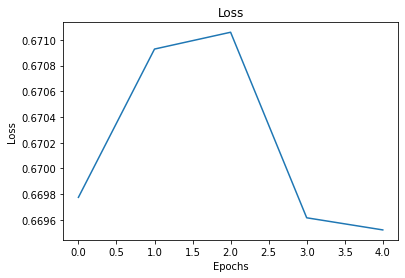

In [ ]:
plt.plot(data_model.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val Loss')

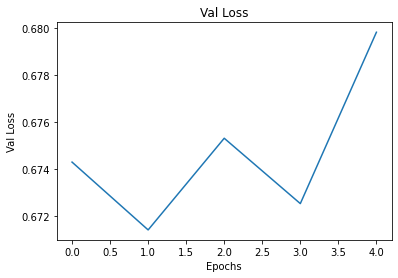

In [ ]:
plt.plot(data_model.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')